In [107]:
import matplotlib.pyplot as plt
import gensim
import numpy as np
import spacy
import pandas as pd
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.corpora import Dictionary
import pyLDAvis.gensim_models
%matplotlib inline



In [108]:
from urlextract import URLExtract

extractor = URLExtract()

def format_tweet(tweet):
    # mask web urls
    urls = extractor.find_urls(tweet)
    for url in urls:
        tweet = tweet.replace(url, "")
    return tweet

In [109]:
df = pd.read_csv("data_elonmusk.csv", encoding='latin1')
df.sample(10)

,row ID,Tweet,Time,Retweet from,User
677,Row677,Even more boring https://t.co/EfrzLAXwxs,2017-04-28 23:57:57,NaN,elonmusk
669,Row669,Winds aloft are unusually high (still within s...,2017-05-01 14:12:07,NaN,elonmusk
307,Row307,RT @mcannonbrookes: ??! This is a massive win ...,2017-07-08 13:40:07,mcannonbrookes,elonmusk
1358,Row1358,Tesla keeps temp below 40C/105F by automatical...,2016-09-21 17:32:02,NaN,elonmusk
938,Row938,"@W4AS Good grief, I'm not working for Trump. I...",2017-02-05 19:16:23,NaN,elonmusk
617,Row617,@AndrewHws My grandmother was from Moose Jaw,2017-05-13 05:51:41,NaN,elonmusk
1303,Row1303,RT @Space_Station: Cameras outside the space s...,2016-10-04 00:19:12,Space_Station,elonmusk
399,Row399,@shashwatbakhshi No plans to change cell form ...,2017-06-19 18:49:32,NaN,elonmusk
1350,Row1350,Tesla is sometimes criticized for government s...,2016-09-22 04:57:08,NaN,elonmusk
289,Row289,@hohocho Cool!,2017-07-12 02:54:29,NaN,elonmusk


In [110]:
from tqdm import tqdm


tweets=df["Tweet"].values.tolist()
tweets=[format_tweet(tweet) for tweet in tweets]
def accept_token(token):
    return bool(not token.is_stop and not token.is_punct and (token.text not in [" ", "\n", "\t"]) and not w.like_num)


nlp = spacy.load("en_core_web_sm")


cleaned_tweets=[]

for tweet in tqdm(tweets):
    text = []
    doc = nlp(tweet)
    for w in doc:
        if accept_token(w):
            text.append(w.lemma_)
    cleaned_tweets.append(text)

print(cleaned_tweets[:10])

100%|██████████| 3218/3218 [00:44<00:00, 72.32it/s]

[['@meltingice', 'assume', 'max', 'acceleration', 'g', 'comfortable', 'direction', 'feel', 'like', 'mild', 'moder'], ['RT', '@SpaceX', 'BFR', 'capable', 'transport', 'satellite', 'orbit', 'crew', 'cargo', '@space_station', 'complete', 'mission', 'Moon'], ['@bigajm', 'yup'], [], ['fly', 'place', 'Earth', 'min', 'cost', 'seat'], ['RT', '@SpaceX', 'support', 'creation', 'permanent', 'self', 'sustain', 'human', 'presence', 'Mars'], ['BFR', 'Earth', 'min'], ['Mars', 'City', 'Opposite', 'Earth', 'dawn', 'dusk', 'sky', 'blue', 'Mars', 'day', 'sky', 'red'], ['Moon', 'Base', 'Alpha'], ['announce', 'special', 'today', 'talk']]


In [111]:
bigram = gensim.models.Phrases(cleaned_tweets)
texts = [bigram[line] for line in cleaned_tweets]
print(texts[10:50])

[['RT_@SpaceX', 'year_ago', 'today', 'Falcon', 'privately', 'develop', 'liquid', 'fuel', 'rocket', 'orbit', 'Earth'], ['@kevinroose', 'day', 'office'], ['@Fashionista_com', '@mayemusk', 'Congrats', 'Mom', 'love'], ['RT', '@mayemusk', '.@covergirl', 'excited', 'officially', 'COVERGIRL', 'beauty', 'age', 'COVERGIRLMADE', 'https://'], ['Prev', 'idea', 'pay', '~$10B', 'dev', 'cost', 'incl', 'Kickstarter', 'collect', 'underpant', 'turn', 'um', 'lucrative', 'expect'], ['head', 'Adelaide', 'soon', 'describe', 'new', 'BFR', 'planetary', 'colonizer', 'design', 'detail', '@IAC2017', 'worth', 'see', 'design', 'feel', 'right'], ['@el_deano', '@daimler', '@jalopnik', 'yes'], ['good', 'NYT', 'article', 'year_ago', 'value', 'fiction'], ['@AdrianZorrillaC', 'yes'], ['simulation', 'SpaceX', 'Interplanetary', 'Spaceship', 'Rocket', 'design', 'work'], ['@daimler', 'good'], ['major', 'improvement', 'unexpected', 'application', 'unveil', 'Friday', '@IAC2017', 'Australia'], ['presentation', '@SpaceX', 'Inte

In [112]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
print(corpus[:10])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], [(10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)], [(22, 1), (23, 1)], [], [(24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)], [(13, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)], [(11, 1), (24, 1), (27, 1)], [(24, 1), (30, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 2)], [(12, 1), (46, 1), (47, 1)], [(48, 1), (49, 1), (50, 1), (51, 1)]]


In [113]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\linalg\_special_ma

In [114]:
lsimodel.show_topics(num_topics=5)  # Showing only the top 5 topics

[(0,
  '0.635*"Tesla" + 0.508*"RT" + 0.296*"car" + 0.150*"good" + 0.130*"@elonmusk" + 0.086*"drive" + 0.086*"thank" + 0.084*"year" + 0.081*"RT_@teslamotor" + 0.076*"Model_S"'),
 (1,
  '-0.699*"RT" + 0.610*"Tesla" + -0.197*"@elonmusk" + -0.098*"good" + 0.079*"RT_@teslamotor" + -0.076*"Tesla_Model" + -0.065*"launch" + -0.062*"S" + -0.050*"Mars" + 0.046*"car"'),
 (2,
  '0.469*"launch" + 0.353*"good" + 0.351*"RT_@SpaceX" + -0.277*"RT" + 0.232*"rocket" + 0.186*"Dragon" + -0.159*"Tesla" + 0.143*"landing" + 0.138*"Falcon" + 0.129*"need"'),
 (3,
  '0.660*"car" + 0.432*"good" + -0.273*"launch" + -0.270*"Tesla" + -0.229*"RT_@SpaceX" + -0.190*"RT" + -0.092*"Dragon" + 0.076*"Model_S" + -0.076*"ET" + 0.072*"S"'),
 (4,
  '-0.686*"good" + 0.568*"car" + 0.205*"RT_@SpaceX" + 0.182*"launch" + -0.131*"Tesla" + -0.072*"world" + 0.065*"ET" + 0.063*"Dragon" + 0.059*"Falcon" + 0.056*"Model_S"')]

In [115]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

In [116]:
hdpmodel.show_topics()

[(0,
  "0.001*compare + 0.001*temporary + 0.001*driver + 0.001*Uranium + 0.001*@AwarenessReef + 0.001*parameter + 0.001*Highway + 0.001*McCarran + 0.001*ol' + 0.001*@jordanrushbloch + 0.001*Propulsion + 0.001*@GrahamABlair + 0.001*case + 0.001*clarification + 0.001*civ + 0.001*@avyas0 + 0.001*MARS + 0.001*buff + 0.001*Leo + 0.001*verify"),
 (1,
  '0.001*tomorrow + 0.001*anomaly + 0.001*test + 0.001*simultaneity + 0.001*security + 0.001*@phillipcjackson + 0.001*@Zedd + 0.001*selfie + 0.001*km + 0.001*saltwater + 0.001*line + 0.001*@AndrewKemendo + 0.001*DOE + 0.001*subpoena + 0.001*@miles_brundage + 0.001*terminate + 0.001*RT + 0.001*Predicts + 0.001*Correll + 0.001*transform'),
 (2,
  '0.001*arm + 0.001*driver + 0.001*ratio + 0.001*mature + 0.001*operation + 0.001*disable + 0.001*FTC + 0.001*@batfflck + 0.001*problem + 0.001*@romn8tr + 0.001*foundation + 0.001*delete + 0.001*Newton + 0.001*hexacopter + 0.001*septum + 0.001*@GangsOfGtown + 0.001*mountain + 0.001*grant + 0.001*@kakurady 

In [128]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [129]:
ldamodel.show_topics()

[(0,
  '0.024*"Tesla" + 0.021*"car" + 0.010*"RT" + 0.009*"people" + 0.009*"w" + 0.007*"rocket" + 0.007*"love" + 0.007*"great" + 0.007*"say" + 0.006*"orbit"'),
 (1,
  '0.011*"Tesla" + 0.011*"flight" + 0.008*"gas" + 0.007*"RT_@teslamotor" + 0.007*"rocket" + 0.007*"good" + 0.006*"launch_pad" + 0.006*"launch" + 0.006*"take" + 0.006*"engineering"'),
 (2,
  '0.018*"RT" + 0.010*"like" + 0.009*"Tesla" + 0.008*"m" + 0.008*"rocket" + 0.008*"land" + 0.007*"launch" + 0.007*"good" + 0.007*"RT_@SpaceX" + 0.006*"Mars"'),
 (3,
  '0.016*"Tesla" + 0.013*"good" + 0.008*"RT" + 0.006*"time" + 0.005*"article" + 0.005*"Space_Station" + 0.005*"week" + 0.005*"right" + 0.004*"piece" + 0.004*"thank"'),
 (4,
  '0.009*"good" + 0.009*"landing" + 0.007*"article" + 0.007*"launch" + 0.007*"rocket" + 0.007*"Tesla" + 0.006*"yes" + 0.006*"need" + 0.005*"work" + 0.005*"CO2"'),
 (5,
  '0.018*"RT" + 0.011*"good" + 0.010*"thank" + 0.009*"Tesla_Model" + 0.009*"Dragon" + 0.008*"Tesla" + 0.008*"launch" + 0.007*"S" + 0.006*"sure

In [119]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.decomposition import NMF, LatentDirichletAllocation

In [120]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

# dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
# documents = dataset.data

no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tweets)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(tweets)
tf_feature_names = tf_vectorizer.get_feature_names_out()

no_topics = 10

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10
print("NMF")
print("="*50)
display_topics(nmf, tfidf_feature_names, no_top_words)
print("="*50)
print("LDA")
display_topics(lda, tf_feature_names, no_top_words)

NMF
Topic 0:
yes vicentes year just won way arguably actually 20 danahull
Topic 1:
teslamotors rt cool year welcome supercharger new roof autopilot coming
Topic 2:
spacex launch falcon rocket landing dragon stage rt nasa live
Topic 3:
tesla just car autopilot new cars solarcity solar people year
Topic 4:
thanks cool car spacex jon_favreau westcoastbill bonnienorman new work forward
Topic 5:
good point people piece like looks chance just rocket idea
Topic 6:
exactly love newscientist redletterdave looking fortunemagazine business john_gardi need energy
Topic 7:
model review like car production owner best version vs series
Topic 8:
yeah great probably love lot really just time sure don
Topic 9:
rt elonmusk https mars openai best world future car ve
LDA
Topic 0:
teslamotors rt model great high ve best needed car miles
Topic 1:
love really time just california talk course read 30 hopefully
Topic 2:
rt tesla spacex elonmusk thanks live long hyperloop new car
Topic 3:
model production car re

In [121]:

pyLDAvis.enable_notebook(local=True)
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)

pyLDAvis.display(vis)

In [122]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [123]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

In [124]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

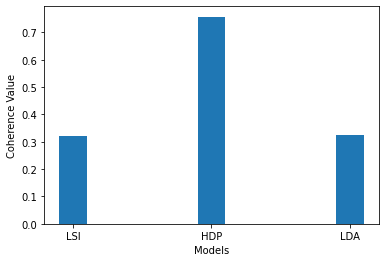

In [125]:

evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])